In [97]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator, QiskitRuntimeService

from qiskit.quantum_info.operators import Operator, Pauli

from qiskit.circuit.library import UnitaryGate, QFT, RYGate, RealAmplitudes, HamiltonianGate


from qiskit.visualization import plot_histogram
import numpy as np
from math import cos,sin, pi, e, asin, log, factorial

%matplotlib inline

In [98]:
service = QiskitRuntimeService(channel="ibm_quantum", token="77d55ab1f771f94f950d9a2ceddb5936a7d4f6a910a1fa73f2375c336af43585f40d831e221a3525bf57b651952f8a1e8ac7405b2f6319d1a5963288a69ef0c0")
QiskitRuntimeService.save_account(channel="ibm_quantum", token="77d55ab1f771f94f950d9a2ceddb5936a7d4f6a910a1fa73f2375c336af43585f40d831e221a3525bf57b651952f8a1e8ac7405b2f6319d1a5963288a69ef0c0", overwrite=True)

In [99]:
N = 4
zeros = np.matrix([[0+0j, 0+0j, 0+0j, 0+0j],
                   [0+0j, 0+0j, 0+0j, 0+0j],
                   [0+0j, 0+0j, 0+0j, 0+0j],
                   [0+0j, 0+0j, 0+0j, 0+0j]])

A = np.matrix([[1, 1, 1, 1], 
               [1, np.exp(0+1j * 2 * np.pi / N)**(-1*1), np.exp(0+1j * 2 * np.pi / N)**(-1*2), np.exp(0+1j * 2 * np.pi / N)**(-1*3)], 
               [1, np.exp(0+1j * 2 * np.pi / N)**(-2*1), np.exp(0+1j * 2 * np.pi / N)**(-2*2), np.exp(0+1j * 2 * np.pi / N)**(-2*3)], 
               [1, np.exp(0+1j * 2 * np.pi / N)**(-3*1), np.exp(0+1j * 2 * np.pi / N)**(-3*2), np.exp(0+1j * 2 * np.pi / N)**(-3*3)]])

temp1 = np.concatenate((zeros, A), axis=0)
temp2 = np.concatenate((A.transpose().conjugate(), zeros), axis=0)

precision = 9

A = np.concatenate((temp1, temp2), axis=1)
A

matrix([[ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
          0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
          1.0000000e+00-0.0000000e+00j,  1.0000000e+00-0.0000000e+00j,
          1.0000000e+00-0.0000000e+00j,  1.0000000e+00-0.0000000e+00j],
        [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
          0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
          1.0000000e+00-0.0000000e+00j,  6.1232340e-17+1.0000000e+00j,
         -1.0000000e+00+1.2246468e-16j, -1.8369702e-16-1.0000000e+00j],
        [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
          0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
          1.0000000e+00-0.0000000e+00j, -1.0000000e+00+1.2246468e-16j,
          1.0000000e+00-2.4492936e-16j, -1.0000000e+00+3.6739404e-16j],
        [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
          0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
   

In [100]:
U = HamiltonianGate(A, 1, 'U')
U

Instruction(name='hamiltonian', num_qubits=3, num_clbits=0, params=[array([[ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         1.0000000e+00-0.0000000e+00j,  1.0000000e+00-0.0000000e+00j,
         1.0000000e+00-0.0000000e+00j,  1.0000000e+00-0.0000000e+00j],
       [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         1.0000000e+00-0.0000000e+00j,  6.1232340e-17+1.0000000e+00j,
        -1.0000000e+00+1.2246468e-16j, -1.8369702e-16-1.0000000e+00j],
       [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         1.0000000e+00-0.0000000e+00j, -1.0000000e+00+1.2246468e-16j,
         1.0000000e+00-2.4492936e-16j, -1.0000000e+00+3.6739404e-16j],
       [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e

In [101]:
def get_list_hamiltonians_from_U(A, precision):
    U = A
    U_arrays = [U]
    for i in range(precision):
        U_arrays.append(np.dot(U, U))
    return U_arrays

H = get_list_hamiltonians_from_U(A, precision)
H

[matrix([[ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
           0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
           1.0000000e+00-0.0000000e+00j,  1.0000000e+00-0.0000000e+00j,
           1.0000000e+00-0.0000000e+00j,  1.0000000e+00-0.0000000e+00j],
         [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
           0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
           1.0000000e+00-0.0000000e+00j,  6.1232340e-17+1.0000000e+00j,
          -1.0000000e+00+1.2246468e-16j, -1.8369702e-16-1.0000000e+00j],
         [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
           0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
           1.0000000e+00-0.0000000e+00j, -1.0000000e+00+1.2246468e-16j,
           1.0000000e+00-2.4492936e-16j, -1.0000000e+00+3.6739404e-16j],
         [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
           0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.000

In [102]:
U_array = get_list_hamiltonians_from_U(U, precision)
U_array

[Instruction(name='hamiltonian', num_qubits=3, num_clbits=0, params=[array([[ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
          0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
          1.0000000e+00-0.0000000e+00j,  1.0000000e+00-0.0000000e+00j,
          1.0000000e+00-0.0000000e+00j,  1.0000000e+00-0.0000000e+00j],
        [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
          0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
          1.0000000e+00-0.0000000e+00j,  6.1232340e-17+1.0000000e+00j,
         -1.0000000e+00+1.2246468e-16j, -1.8369702e-16-1.0000000e+00j],
        [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
          0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
          1.0000000e+00-0.0000000e+00j, -1.0000000e+00+1.2246468e-16j,
          1.0000000e+00-2.4492936e-16j, -1.0000000e+00+3.6739404e-16j],
        [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
      

In [103]:
reg_qpe_clock = QuantumRegister(precision, name="clock")
reg_qpe_b = QuantumRegister(log(len(U.to_matrix()), 2), name="b")
reg_qpe_classico = ClassicalRegister(precision)
circuit_qpe = QuantumCircuit(reg_qpe_clock, reg_qpe_b, reg_qpe_classico)

circuit_qpe.draw()

clock_0: 
         
clock_1: 
         
clock_2: 
         
clock_3: 
         
clock_4: 
         
clock_5: 
         
clock_6: 
         
clock_7: 
         
clock_8: 
         
    b_0: 
         
    b_1: 
         
    b_2: 
         
   c8: 9/

In [104]:
def make_u(matrix,i=0, inverse=False):
    if inverse:
        u = Operator(np.linalg.inv(matrix))
    
        gate = UnitaryGate(u, label=f"Uˆ{2**i}")
    else:
        u = Operator(matrix)
    
        gate = UnitaryGate(u, label=f"Uˆ{2**i}")
    return gate


def qpe(circuit, U_array, reg_clock, reg_b, precision, inverse=False):
    if inverse:
        for i in range(precision):
            circuit.append(make_u(U_array[precision-i-1], precision-i-1, inverse=inverse).control(1), [reg_clock[i]] + [reg_b[j] for j in range(reg_b.size)])

        circuit.h(reg_clock)
    else:
        circuit.h(reg_qpe_clock)

        for i in range(precision):
            circuit.append(make_u(U_array[i], i).control(1), [reg_clock[i]] + [reg_b[j] for j in range(reg_b.size)])

    
    circuit.draw()

In [105]:
qpe(circuit_qpe, U_array, reg_qpe_clock, reg_qpe_b, precision)
circuit_qpe.append(QFT(precision,inverse=True),reg_qpe_clock)
circuit_qpe.measure(reg_qpe_clock, reg_qpe_classico)
circuit_qpe.draw()

┌───┐                                                           »
clock_0: ┤ H ├───■───────────────────────────────────────────────────────»
         ├───┤   │                                                       »
clock_1: ┤ H ├───┼───────■───────────────────────────────────────────────»
         ├───┤   │       │                                               »
clock_2: ┤ H ├───┼───────┼───────■───────────────────────────────────────»
         ├───┤   │       │       │                                       »
clock_3: ┤ H ├───┼───────┼───────┼───────■───────────────────────────────»
         ├───┤   │       │       │       │                               »
clock_4: ┤ H ├───┼───────┼───────┼───────┼────────■──────────────────────»
         ├───┤   │       │       │       │        │                      »
clock_5: ┤ H ├───┼───────┼───────┼───────┼────────┼────────■─────────────»
         ├───┤   │       │       │       │        │        │             »
clock_6: ┤ H ├───┼───────┼───────┼───────┼────────┼────────┼────────■────»
         ├───┤   │       │       │       │        │        │        │    »
clock_7: ┤ H ├───┼───────┼───────┼───────┼────────┼────────┼────────┼────»
         ├───┤   │       │       │       │        │        │        │    »
clock_8: ┤ H ├───┼───────┼───────┼───────┼────────┼────────┼────────┼────»
         └───┘┌──┴───┐┌──┴───┐┌──┴───┐┌──┴───┐┌───┴───┐┌───┴───┐┌───┴───┐»
    b_0: ─────┤0     ├┤0     ├┤0     ├┤0     ├┤0      ├┤0      ├┤0      ├»
              │      ││      ││      ││      ││       ││       ││       │»
    b_1: ─────┤1 Uˆ1 ├┤1 Uˆ2 ├┤1 Uˆ4 ├┤1 Uˆ8 ├┤1 Uˆ16 ├┤1 Uˆ32 ├┤1 Uˆ64 ├»
              │      ││      ││      ││      ││       ││       ││       │»
    b_2: ─────┤2     ├┤2     ├┤2     ├┤2     ├┤2      ├┤2      ├┤2      ├»
              └──────┘└──────┘└──────┘└──────┘└───────┘└───────┘└───────┘»
   c8: 9/════════════════════════════════════════════════════════════════»
                                                                         »
«                             ┌───────┐┌─┐                        
«clock_0: ────────────────────┤0      ├┤M├────────────────────────
«                             │       │└╥┘┌─┐                     
«clock_1: ────────────────────┤1      ├─╫─┤M├─────────────────────
«                             │       │ ║ └╥┘┌─┐                  
«clock_2: ────────────────────┤2      ├─╫──╫─┤M├──────────────────
«                             │       │ ║  ║ └╥┘┌─┐               
«clock_3: ────────────────────┤3      ├─╫──╫──╫─┤M├───────────────
«                             │       │ ║  ║  ║ └╥┘┌─┐            
«clock_4: ────────────────────┤4 IQFT ├─╫──╫──╫──╫─┤M├────────────
«                             │       │ ║  ║  ║  ║ └╥┘┌─┐         
«clock_5: ────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├─────────
«                             │       │ ║  ║  ║  ║  ║ └╥┘┌─┐      
«clock_6: ────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├──────
«                             │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
«clock_7: ────■───────────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├───
«             │               │       │ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
«clock_8: ────┼─────────■─────┤8      ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├
«         ┌───┴────┐┌───┴────┐└───────┘ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
«    b_0: ┤0       ├┤0       ├──────────╫──╫──╫──╫──╫──╫──╫──╫──╫─
«         │        ││        │          ║  ║  ║  ║  ║  ║  ║  ║  ║ 
«    b_1: ┤1 Uˆ128 ├┤1 Uˆ256 ├──────────╫──╫──╫──╫──╫──╫──╫──╫──╫─
«         │        ││        │          ║  ║  ║  ║  ║  ║  ║  ║  ║ 
«    b_2: ┤2       ├┤2       ├──────────╫──╫──╫──╫──╫──╫──╫──╫──╫─
«         └────────┘└────────┘          ║  ║  ║  ║  ║  ║  ║  ║  ║ 
«   c8: 9/══════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩═
«                                       0  1  2  3  4  5  6  7  8

## Execução de circuitos

In [106]:
from qiskit_aer.noise import NoiseModel
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

# Serviço de execução
service = QiskitRuntimeService()
# backend = service.backend("ibm_sherbrooke")

# backend_noise = AerSimulator(noise_model=NoiseModel.from_backend(backend))
# print(backend_noise)

from qiskit.providers.basic_provider import BasicSimulator

backend_sim = BasicSimulator()
print(backend)

<IBMBackend('ibm_sherbrooke')>


In [107]:
def run_simulation(qc,shots=100000):    
    # Execute the circuit on the qasm simulator
    qc = transpile(qc, backend_sim)

    job_sim = backend_sim.run(qc, shots=shots)
    job_sim.wait_for_final_state(timeout=None, wait=5, callback=None)

    # Grab the results from the job.
    result_sim = job_sim.result()

    # Print the counts, which are contained in a Python dictionary
    counts = result_sim.get_counts(qc)

    return counts

    # sim_alpha = np.array([[counts.get("001",1)],[counts.get("011",1)],[counts.get("101",1)],[counts.get("111",1)]])

    # plot_histogram(counts)

    return sim_alpha

def run_noise_simulation(qc,shots=100000):    
    # Execute the circuit on the qasm simulator
    qc = transpile(qc, backend_noise)

    job_sim = backend_noise.run(qc, shots=shots)
    job_sim.wait_for_final_state(timeout=None, wait=5, callback=None)

    # Grab the results from the job.
    result_sim = job_sim.result()


    # Print the counts, which are contained in a Python dictionary
    counts = result_sim.get_counts()

    return counts

In [108]:
counts = run_simulation(circuit_qpe,shots=1000)
# counts2 = run_noise_simulation(circuit_qpe,shots=1000)

In [109]:
from operator import itemgetter

counts
res = dict(sorted(counts.items(), key=itemgetter(1), reverse=True)[:len(A)])
res

{'101001001': 46,
 '010110111': 34,
 '011010111': 33,
 '101000101': 33,
 '100100101': 31,
 '010111011': 30,
 '011011011': 27,
 '010101011': 27}

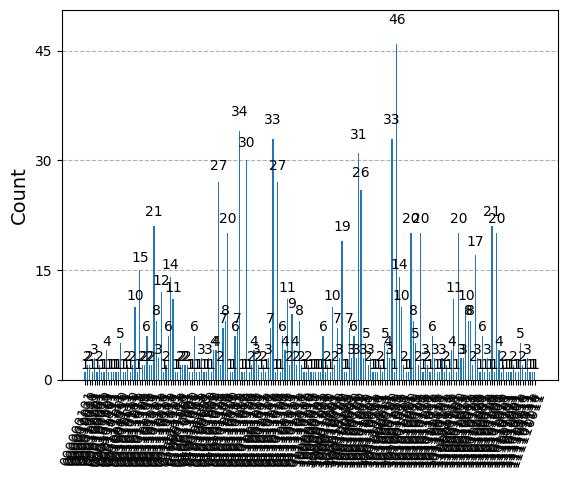

In [110]:
plot_histogram(counts)

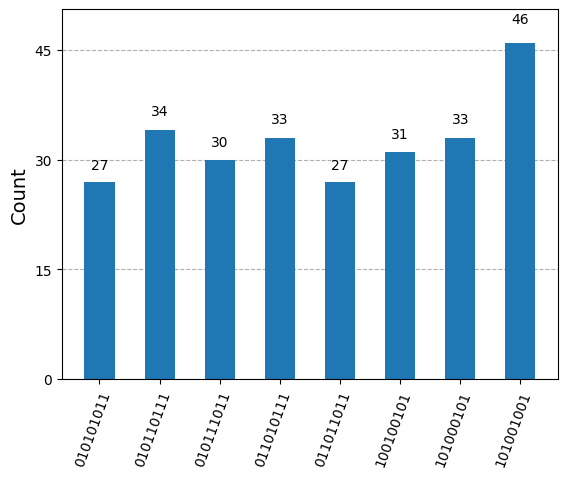

In [111]:
plot_histogram(res)

In [112]:
def make_list_lambda(res):
    lmb = []
    for k,v in res.items():
        lmb.append(int(str(k),2))
    return lmb

lmb = make_list_lambda(res)
lmb

[329, 183, 215, 325, 293, 187, 219, 171]

## HHL

In [113]:
reg_hhl_ancilla = QuantumRegister(1, name="ancilla")
reg_hhl_clock = QuantumRegister(precision, name="clock")
reg_hhl_b = QuantumRegister(log(len(U.to_matrix()),2), name="b")
reg_hhl_ancilla_classico = ClassicalRegister(1)
reg_hhl_classico = ClassicalRegister(log(len(U.to_matrix()),2))
circuit_hhl = QuantumCircuit(reg_hhl_ancilla, reg_hhl_clock, reg_hhl_b, reg_hhl_ancilla_classico, reg_hhl_classico)

%matplotlib inline

circuit_hhl.draw()

ancilla: 
         
clock_0: 
         
clock_1: 
         
clock_2: 
         
clock_3: 
         
clock_4: 
         
clock_5: 
         
clock_6: 
         
clock_7: 
         
clock_8: 
         
    b_0: 
         
    b_1: 
         
    b_2: 
         
   c9: 1/
         
  c10: 3/

In [114]:
def rotacoes_controladas(circuit, reg_clock, reg_ancilla, lmb, precision):
    for i in lmb:
        print(i)
        print(bin(i)[2:].zfill(precision))
        # if (len(bin(i)[2:]) > precision):
        #     raise Exception("""
        #     O número necessário de bits para representar autovalores excede o número de bits de precisão.
        #     Precisão: """ + """str(precision) """+ 
        #     """Registrador de clock: """ + str(len(bin(i)[2:])))
        circuit.append(RYGate(2*asin(1/i)).control(precision, ctrl_state=bin(i)[2:2+precision].zfill(precision)), [reg_clock[j] for j in range(precision)] + [reg_ancilla])


In [115]:
def hhl_generico(A, precision):
    qpe(circuit_hhl, U_array, reg_hhl_clock, reg_hhl_b, precision)

    circuit_hhl.append(QFT(precision,inverse=True),reg_hhl_clock)

    lmb = make_list_lambda(res)

    rotacoes_controladas(circuit_hhl, reg_hhl_clock, reg_hhl_ancilla, lmb, precision)

    circuit_hhl.measure(reg_hhl_ancilla, reg_hhl_ancilla_classico)

    circuit_hhl.append(QFT(precision,inverse=False),reg_hhl_clock)

    qpe(circuit_hhl, U_array, reg_hhl_clock, reg_hhl_b, precision, inverse=True)

    circuit_hhl.measure(reg_hhl_b, reg_hhl_classico)

    circuit_hhl.draw()

    return circuit_hhl

In [116]:
circuit_hhl = hhl_generico(A, precision)

329
101001001
183
010110111
215
011010111
325
101000101
293
100100101
187
010111011
219
011011011
171
010101011


In [117]:
circuit_hhl.draw()

»
ancilla: ────────────────────────────────────────────────────────────────»
         ┌───┐                                                           »
clock_0: ┤ H ├───■───────────────────────────────────────────────────────»
         ├───┤   │                                                       »
clock_1: ┤ H ├───┼───────■───────────────────────────────────────────────»
         ├───┤   │       │                                               »
clock_2: ┤ H ├───┼───────┼───────■───────────────────────────────────────»
         ├───┤   │       │       │                                       »
clock_3: ┤ H ├───┼───────┼───────┼───────■───────────────────────────────»
         ├───┤   │       │       │       │                               »
clock_4: ┤ H ├───┼───────┼───────┼───────┼────────■──────────────────────»
         ├───┤   │       │       │       │        │                      »
clock_5: ┤ H ├───┼───────┼───────┼───────┼────────┼────────■─────────────»
         ├───┤   │       │       │       │        │        │             »
clock_6: ┤ H ├───┼───────┼───────┼───────┼────────┼────────┼────────■────»
         ├───┤   │       │       │       │        │        │        │    »
clock_7: ┤ H ├───┼───────┼───────┼───────┼────────┼────────┼────────┼────»
         ├───┤   │       │       │       │        │        │        │    »
clock_8: ┤ H ├───┼───────┼───────┼───────┼────────┼────────┼────────┼────»
         └───┘┌──┴───┐┌──┴───┐┌──┴───┐┌──┴───┐┌───┴───┐┌───┴───┐┌───┴───┐»
    b_0: ─────┤0     ├┤0     ├┤0     ├┤0     ├┤0      ├┤0      ├┤0      ├»
              │      ││      ││      ││      ││       ││       ││       │»
    b_1: ─────┤1 Uˆ1 ├┤1 Uˆ2 ├┤1 Uˆ4 ├┤1 Uˆ8 ├┤1 Uˆ16 ├┤1 Uˆ32 ├┤1 Uˆ64 ├»
              │      ││      ││      ││      ││       ││       ││       │»
    b_2: ─────┤2     ├┤2     ├┤2     ├┤2     ├┤2      ├┤2      ├┤2      ├»
              └──────┘└──────┘└──────┘└──────┘└───────┘└───────┘└───────┘»
   c9: 1/════════════════════════════════════════════════════════════════»
                                                                         »
  c10: 3/════════════════════════════════════════════════════════════════»
                                                                         »
«                                      ┌──────────────┐┌──────────────┐»
«ancilla: ─────────────────────────────┤ Ry(0.006079) ├┤ Ry(0.010929) ├»
«                             ┌───────┐└──────┬───────┘└──────┬───────┘»
«clock_0: ────────────────────┤0      ├───────■───────────────■────────»
«                             │       │       │               │        »
«clock_1: ────────────────────┤1      ├───────o───────────────■────────»
«                             │       │       │               │        »
«clock_2: ────────────────────┤2      ├───────o───────────────■────────»
«                             │       │       │               │        »
«clock_3: ────────────────────┤3      ├───────■───────────────o────────»
«                             │       │       │               │        »
«clock_4: ────────────────────┤4 IQFT ├───────o───────────────■────────»
«                             │       │       │               │        »
«clock_5: ────────────────────┤5      ├───────o───────────────■────────»
«                             │       │       │               │        »
«clock_6: ────────────────────┤6      ├───────■───────────────o────────»
«                             │       │       │               │        »
«clock_7: ────■───────────────┤7      ├───────o───────────────■────────»
«             │               │       │       │               │        »
«clock_8: ────┼─────────■─────┤8      ├───────■───────────────o────────»
«         ┌───┴────┐┌───┴────┐└───────┘                                »
«    b_0: ┤0       ├┤0       ├─────────────────────────────────────────»
«         │        ││        │                                         »
«    b_1: ┤1 Uˆ128 ├┤1 Uˆ256 ├───────────────────────────────────────

In [118]:
counts = run_simulation(circuit_hhl,shots=1000)

In [119]:
counts

{'100 0': 99, '111 0': 90, '000 0': 620, '110 0': 99, '101 0': 92}

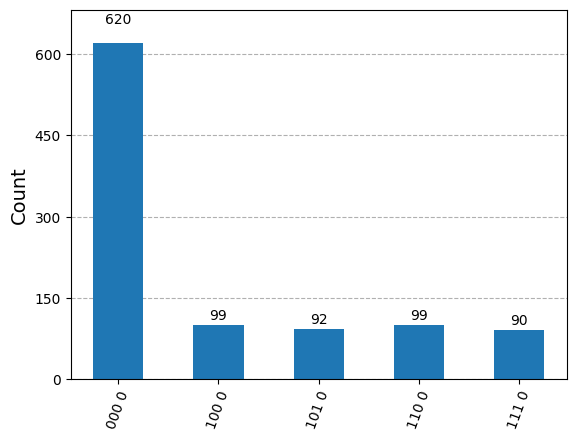

In [120]:
plot_histogram(counts)